In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats


In [ ]:
# Load the dataset
df = pd.read_csv('Final_Dataset.csv', index_col=0)
df

,Player,Position,Team,Comp,Age,MP,Min,Goals,Ast,G+A,...,Shots Blocked,Interceptions,Clearances,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values
0,Antonee Robinson,DF,fulham,eng Premier League,27-175,23,2070,0,9,9,...,13,44,75,0,25,7034,27,96,61.4,28000000.0
1,Illia Zabarnyi,DF,bournemouth,eng Premier League,22-151,23,2070,0,0,0,...,7,23,117,2,4,7181,10,109,67.9,38000000.0
2,Nathan Collins,DF,brentford,eng Premier League,23-275,23,2070,2,1,3,...,12,20,130,2,5,7142,10,105,65.2,28000000.0
3,Bryan Mbeumo,FW,brentford,eng Premier League,25-176,23,2064,14,3,17,...,41,9,34,0,29,2570,65,95,29.7,50000000.0
4,Moises Caicedo,MF,chelsea,eng Premier League,23-089,23,2035,1,2,3,...,12,33,36,0,14,5574,23,137,70.6,80000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Chadi Riad,DF,crystal palace,eng Premier League,21-227,1,90,0,0,0,...,0,2,0,0,0,568,1,4,33.3,15000000.0
1985,Issa Kabore,"FW,DF",werder bremen,de Bundesliga,23-263,4,90,0,0,0,...,2,0,1,0,3,197,1,5,50.0,6000000.0
1986,Angel Ortiz,DF,betis,es La Liga,20-189,1,90,0,1,1,...,1,2,2,0,1,250,6,5,33.3,14000000.0
1987,Roman Dixon,DF,everton,eng Premier League,20-035,1,90,0,0,0,...,0,1,3,0,0,111,2,6,0.0,14000000.0


In [ ]:
# Rename the 'Age' column and extract the age as an integer
df.rename(columns= {'Age': 'Age-Dob'}, inplace=True)
df['Age'] = df['Age-Dob'].str[:2].astype(int)

df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Interceptions,Clearances,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age
0,Antonee Robinson,DF,fulham,eng Premier League,27-175,23,2070,0,9,9,...,44,75,0,25,7034,27,96,61.4,28000000.0,27
1,Illia Zabarnyi,DF,bournemouth,eng Premier League,22-151,23,2070,0,0,0,...,23,117,2,4,7181,10,109,67.9,38000000.0,22
2,Nathan Collins,DF,brentford,eng Premier League,23-275,23,2070,2,1,3,...,20,130,2,5,7142,10,105,65.2,28000000.0,23
3,Bryan Mbeumo,FW,brentford,eng Premier League,25-176,23,2064,14,3,17,...,9,34,0,29,2570,65,95,29.7,50000000.0,25
4,Moises Caicedo,MF,chelsea,eng Premier League,23-089,23,2035,1,2,3,...,33,36,0,14,5574,23,137,70.6,80000000.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,Chadi Riad,DF,crystal palace,eng Premier League,21-227,1,90,0,0,0,...,2,0,0,0,568,1,4,33.3,15000000.0,21
1985,Issa Kabore,"FW,DF",werder bremen,de Bundesliga,23-263,4,90,0,0,0,...,0,1,0,3,197,1,5,50.0,6000000.0,23
1986,Angel Ortiz,DF,betis,es La Liga,20-189,1,90,0,1,1,...,2,2,0,1,250,6,5,33.3,14000000.0,20
1987,Roman Dixon,DF,everton,eng Premier League,20-035,1,90,0,0,0,...,1,3,0,0,111,2,6,0.0,14000000.0,20


In [107]:
# Split dataset in 3 by position (DF, MF, FW)
df.Position = df.Position.str[:2]
def_df_original = df.loc[df.Position == 'DF']
def_df_original.reset_index(drop=True, inplace=True)
def_df = def_df_original.copy()

mid_df_original = df.loc[df.Position == 'MF']
mid_df_original.reset_index(drop=True, inplace=True)
mid_df = mid_df_original.copy()

fw_df_original = df.loc[df.Position == 'FW']
fw_df_original.reset_index(drop=True, inplace=True)
fw_df = fw_df_original.copy()

df.columns

Index(['Player', 'Position', 'Team', 'Comp', 'Age-Dob', 'MP', 'Min', 'Goals',
       'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh', 'G-xG', 'Pass Cmp%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'Shots Blocked', 'Interceptions',
       'Clearances', 'Errors', 'Dribbles Successful', 'Dribble Distance',
       'Mistakes', 'Ball Recoveries', 'Air Duels Won%', 'Values', 'Age'],
      dtype='object')

In [ ]:
# Define columns for numerical and playing style features

numerical_cols = ['Age', 'MP', 'Min', 'Goals',
       'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh', 'G-xG', 'Pass Cmp%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'Shots Blocked',
       'Interceptions', 'Clearances', 'Errors', 'Dribbles Successful',
       'Dribble Distance', 'Mistakes', 'Ball Recoveries', 'Air Duels Won%']

playing_style_cols = ['Goals', 'Ast', 'xA', 'Through Balls',
                      'Switch Passes', 'Crosses', 'Shot Creating Actions', 'Def Action to Shot',
                      'Tackles', 'Shots Blocked', 'Interceptions', 'Clearances', 'Dribbles Successful',
                      'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

In [ ]:
# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
def_df[numerical_cols] = scaler.fit_transform(def_df[numerical_cols])
mid_df[numerical_cols] = scaler.fit_transform(mid_df[numerical_cols])
fw_df[numerical_cols] = scaler.fit_transform(fw_df[numerical_cols])

In [110]:
def_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Interceptions,Clearances,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age
0,Antonee Robinson,DF,fulham,eng Premier League,27-175,1.000000,1.000000,0.000000,1.000000,0.9,...,0.977778,0.390625,0.000000,0.675676,0.599793,0.600000,0.742188,0.614,28000000.0,0.391304
1,Illia Zabarnyi,DF,bournemouth,eng Premier League,22-151,1.000000,1.000000,0.000000,0.000000,0.0,...,0.511111,0.609375,0.333333,0.108108,0.612467,0.222222,0.843750,0.679,38000000.0,0.173913
2,Nathan Collins,DF,brentford,eng Premier League,23-275,1.000000,1.000000,0.333333,0.111111,0.3,...,0.444444,0.677083,0.333333,0.135135,0.609104,0.222222,0.812500,0.652,28000000.0,0.217391
3,Leif Davis,DF,ipswich town,eng Premier League,25-018,1.000000,0.977273,0.166667,0.222222,0.3,...,0.400000,0.312500,0.166667,0.297297,0.381240,0.644444,0.734375,0.545,25000000.0,0.304348
4,Tyrick Mitchell,DF,crystal palace,eng Premier League,25-151,1.000000,0.966162,0.000000,0.333333,0.3,...,0.177778,0.322917,0.166667,0.270270,0.361755,0.577778,0.875000,0.481,25000000.0,0.304348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Maximiliano Caufriez,DF,valencia,es La Liga,27-349,0.000000,0.000000,0.000000,0.000000,0.0,...,0.022222,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.286,1500000.0,0.391304
800,Chadi Riad,DF,crystal palace,eng Premier League,21-227,0.000000,0.000000,0.000000,0.000000,0.0,...,0.044444,0.000000,0.000000,0.000000,0.042331,0.022222,0.023438,0.333,15000000.0,0.130435
801,Angel Ortiz,DF,betis,es La Liga,20-189,0.000000,0.000000,0.000000,0.111111,0.1,...,0.044444,0.010417,0.000000,0.027027,0.014915,0.133333,0.031250,0.333,14000000.0,0.086957
802,Roman Dixon,DF,everton,eng Premier League,20-035,0.000000,0.000000,0.000000,0.000000,0.0,...,0.022222,0.015625,0.000000,0.000000,0.002931,0.044444,0.039062,0.000,14000000.0,0.086957


In [111]:
mid_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Interceptions,Clearances,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age
0,Moises Caicedo,MF,chelsea,eng Premier League,23-089,1.000000,1.000000,0.071429,0.222222,0.15,...,0.825,0.571429,0.000000,0.241379,0.564547,0.338235,0.957447,0.706,80000000.0,0.272727
1,Cole Palmer,MF,chelsea,eng Premier League,22-269,1.000000,0.987140,1.000000,0.666667,1.00,...,0.125,0.142857,0.142857,0.500000,0.367103,0.632353,0.489362,0.000,130000000.0,0.227273
2,Bruno Guimaraes,MF,newcastle utd,eng Premier League,27-075,1.000000,0.983025,0.142857,0.666667,0.40,...,0.525,0.333333,0.428571,0.396552,0.528952,0.500000,0.773050,0.545,80000000.0,0.454545
3,Youri Tielemans,MF,aston villa,eng Premier League,27-268,1.000000,0.956790,0.071429,0.444444,0.25,...,0.425,0.428571,0.428571,0.344828,0.634216,0.338235,0.659574,0.407,30000000.0,0.454545
4,Andre-Frank Zambo Anguissa,MF,napoli,it Serie A,29-075,0.952381,0.955761,0.357143,0.333333,0.40,...,0.675,0.333333,0.142857,0.344828,0.356556,0.397059,0.680851,0.566,27000000.0,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Edu Exposito,MF,espanyol,es La Liga,28-182,0.095238,0.003086,0.000000,0.000000,0.00,...,0.000,0.031746,0.142857,0.034483,0.028090,0.073529,0.035461,0.250,1500000.0,0.500000
676,Roberto Gagliardini,MF,monza,it Serie A,30-298,0.095238,0.002058,0.000000,0.000000,0.00,...,0.025,0.063492,0.000000,0.000000,0.023628,0.058824,0.000000,0.500,2000000.0,0.590909
677,Chuky san jose,MF,valladolid,es La Liga,20-276,0.142857,0.001543,0.000000,0.000000,0.00,...,0.000,0.015873,0.000000,0.000000,0.007403,0.014706,0.007092,0.000,14000000.0,0.136364
678,Florian Neuhaus,MF,gladbach,de Bundesliga,27-320,0.238095,0.001543,0.000000,0.000000,0.00,...,0.050,0.000000,0.000000,0.017241,0.021702,0.014706,0.049645,0.459,3500000.0,0.454545


In [112]:
fw_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Interceptions,Clearances,Errors,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age
0,Bryan Mbeumo,FW,brentford,eng Premier League,25-176,1.000000,1.000000,0.736842,0.230769,0.53125,...,0.500000,0.918919,0.000000,0.467742,0.644081,0.866667,0.691176,0.297,50000000.0,0.641026
1,Erling Haaland,FW,manchester city,eng Premier League,24-193,1.000000,0.984802,0.947368,0.153846,0.62500,...,0.222222,0.567568,0.000000,0.161290,0.109068,0.480000,0.125000,0.548,200000000.0,0.615385
2,Mohamed Salah,FW,liverpool,eng Premier League,32-229,0.952381,0.938197,1.000000,1.000000,1.00000,...,0.222222,0.135135,0.000000,0.596774,0.560957,0.853333,0.389706,0.400,55000000.0,0.820513
3,Alex Iwobi,FW,fulham,eng Premier League,28-272,1.000000,0.936170,0.368421,0.230769,0.31250,...,0.444444,0.594595,0.000000,0.564516,1.000000,0.533333,0.610294,0.120,25000000.0,0.717949
4,Antoine Semenyo,FW,bournemouth,eng Premier League,25-023,0.952381,0.930091,0.368421,0.230769,0.31250,...,0.277778,0.594595,0.000000,0.758065,0.436020,0.720000,0.779412,0.465,28000000.0,0.641026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Mirko Maric,FW,monza,it Serie A,29-259,0.238095,0.003546,0.000000,0.000000,0.00000,...,0.055556,0.027027,0.000000,0.000000,0.020655,0.040000,0.014706,0.333,700000.0,0.743590
501,Antonio Raimondo,FW,venezia,it Serie A,20-318,0.333333,0.002026,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.333333,0.000000,0.008816,0.066667,0.022059,0.143,14000000.0,0.512821
502,Othmane Maamma,FW,montpellier,fr Ligue 1,19-116,0.142857,0.000507,0.052632,0.076923,0.06250,...,0.055556,0.054054,0.000000,0.064516,0.007809,0.093333,0.014706,0.500,800000.0,0.487179
503,Marc Cardona,FW,las palmas,es La Liga,29-206,0.238095,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.013854,0.013333,0.022059,0.000,1200000.0,0.743590


First, we will start identifying player prototypes within the defenders.

We will use PCA for dimension reduction

In [113]:
# Clustering Defenders

# 2D PCA for dimension reduction
X = def_df[playing_style_cols]
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X))

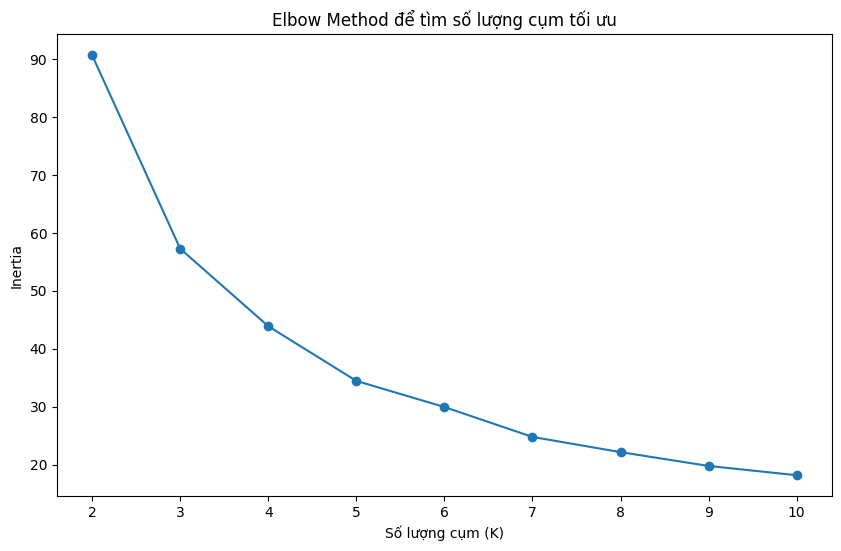

In [ ]:
# Determine optimal number of clusters using the Elbow method
# Elbow method to find the optimal number of clusters
 
inertia = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm số lượng cụm tối ưu')
plt.xticks(K)
plt.show()

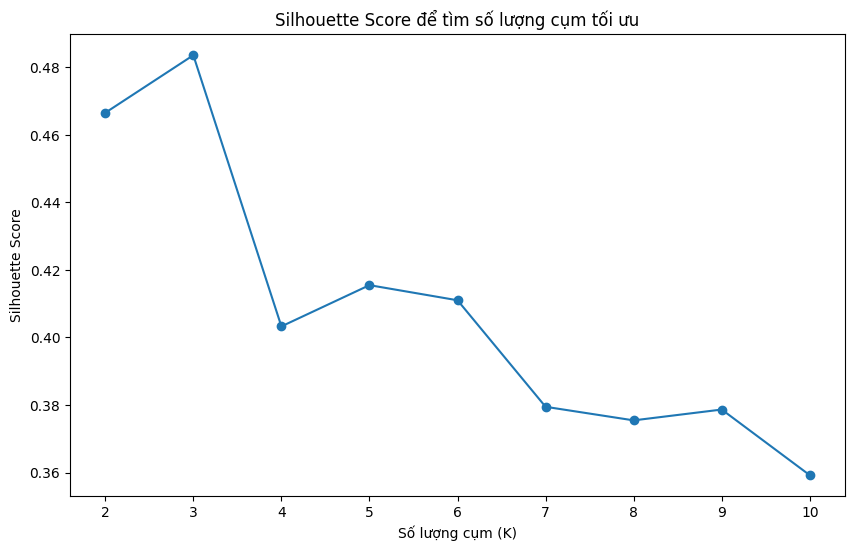

In [ ]:
# Determine optimal number of clusters using the Silhouette method
# Silhouette analysis to find the optimal number of clusters

from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(reduced)
    silhouette_scores.append(silhouette_score(reduced, labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score để tìm số lượng cụm tối ưu')
plt.xticks(K)
plt.show()

In [ ]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

reduced['cluster'] = clusters
reduced['Player'] = def_df['Player']
reduced['Team'] = def_df['Team']
reduced.columns = ['x', 'y', 'cluster', 'Player', 'Team']
reduced.head()

,x,y,cluster,Player,Team
0,1.417828,0.416658,3,Antonee Robinson,fulham
1,0.707565,-0.453612,1,Illia Zabarnyi,bournemouth
2,0.706023,-0.363748,1,Nathan Collins,brentford
3,0.953920,0.516893,3,Leif Davis,ipswich town
4,0.747393,0.343547,3,Tyrick Mitchell,crystal palace


In [117]:
# Show plot of clusters
fig = px.scatter(reduced, x='x', y='y', color='cluster', hover_data=['Player', 'Team'])
fig.show()

In [118]:
def_df = def_df.merge(reduced, on = ['Player', 'Team'])
def_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,x,y,cluster
0,Antonee Robinson,DF,fulham,eng Premier League,27-175,1.000000,1.000000,0.000000,1.000000,0.9,...,0.675676,0.599793,0.600000,0.742188,0.614,28000000.0,0.391304,1.417828,0.416658,3
1,Illia Zabarnyi,DF,bournemouth,eng Premier League,22-151,1.000000,1.000000,0.000000,0.000000,0.0,...,0.108108,0.612467,0.222222,0.843750,0.679,38000000.0,0.173913,0.707565,-0.453612,1
2,Nathan Collins,DF,brentford,eng Premier League,23-275,1.000000,1.000000,0.333333,0.111111,0.3,...,0.135135,0.609104,0.222222,0.812500,0.652,28000000.0,0.217391,0.706023,-0.363748,1
3,Leif Davis,DF,ipswich town,eng Premier League,25-018,1.000000,0.977273,0.166667,0.222222,0.3,...,0.297297,0.381240,0.644444,0.734375,0.545,25000000.0,0.304348,0.953920,0.516893,3
4,Tyrick Mitchell,DF,crystal palace,eng Premier League,25-151,1.000000,0.966162,0.000000,0.333333,0.3,...,0.270270,0.361755,0.577778,0.875000,0.481,25000000.0,0.304348,0.747393,0.343547,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Maximiliano Caufriez,DF,valencia,es La Liga,27-349,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.286,1500000.0,0.391304,-0.645959,0.154470,0
800,Chadi Riad,DF,crystal palace,eng Premier League,21-227,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.042331,0.022222,0.023438,0.333,15000000.0,0.130435,-0.596549,0.114410,0
801,Angel Ortiz,DF,betis,es La Liga,20-189,0.000000,0.000000,0.000000,0.111111,0.1,...,0.027027,0.014915,0.133333,0.031250,0.333,14000000.0,0.086957,-0.561089,0.180115,0
802,Roman Dixon,DF,everton,eng Premier League,20-035,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.002931,0.044444,0.039062,0.000,14000000.0,0.086957,-0.615822,0.249571,0


In [ ]:
cols = ['cluster', 'xA', 'Switch Passes', 'Crosses', 'Shot Creating Actions', 'Tackles',
        'Shots Blocked', 'Interceptions', 'Clearances', 'Dribbles Successful',
        'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

cols_2 = ['xA', 'Switch Passes', 'Crosses', 'Shot Creating Actions', 'Tackles',
        'Shots Blocked', 'Interceptions', 'Clearances', 'Dribbles Successful',
        'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

In order to figue out what kinds of players the clusters represent, we will graph the average scores for each by cluster.

<Axes: title={'center': 'Average Scores for Each Stat by Cluster'}, xlabel='Stats'>

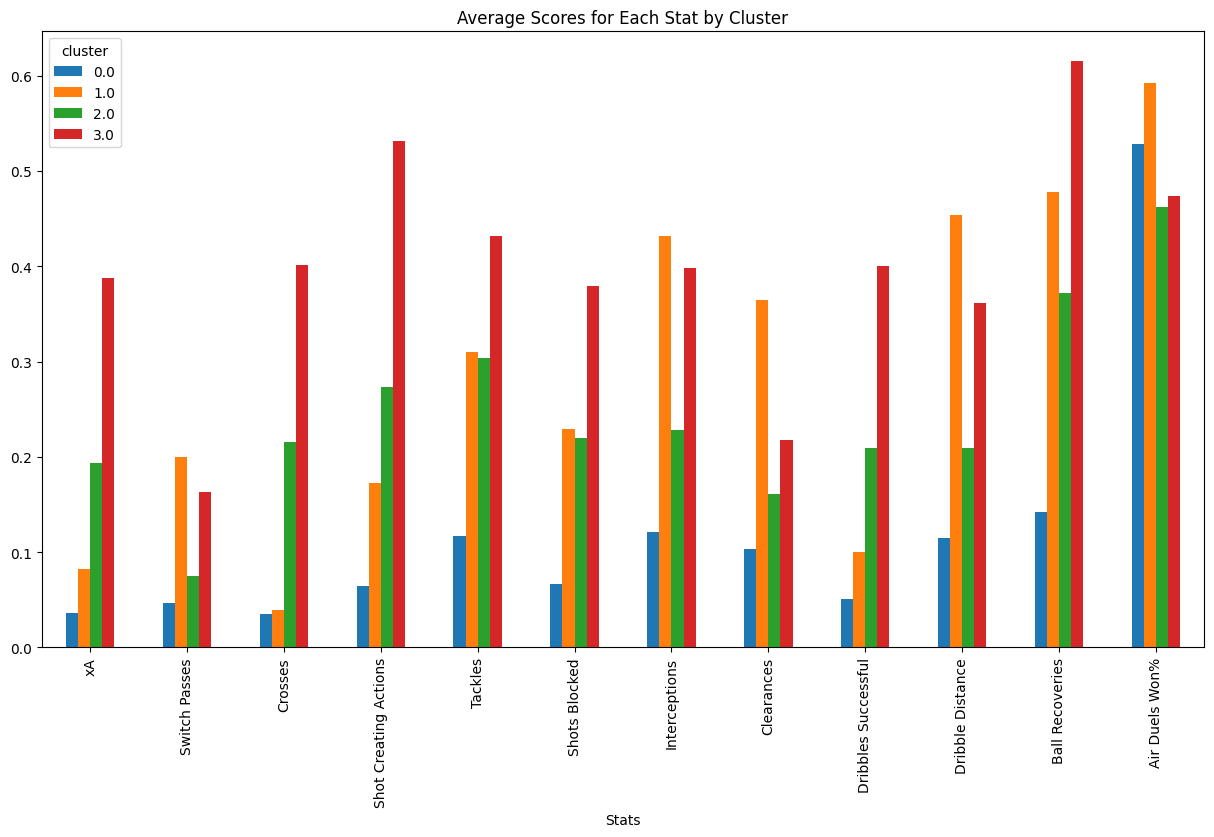

In [120]:
# Setting up average dataframe
avg_0 = pd.DataFrame(def_df[def_df.cluster == 0][cols].describe().loc['mean']).T
avg_1 = pd.DataFrame(def_df[def_df.cluster == 1][cols].describe().loc['mean']).T
avg_2 = pd.DataFrame(def_df[def_df.cluster == 2][cols].describe().loc['mean']).T
avg_3 = pd.DataFrame(def_df[def_df.cluster == 3][cols].describe().loc['mean']).T

frames = [avg_0, avg_1, avg_2, avg_3]
avg_df = pd.concat(frames)
avg_df.set_index('cluster', inplace=True)
avg_df = avg_df.T
avg_df.reset_index(drop=True, inplace=True)
avg_df['Stats'] = pd.Series(cols_2)

# Plotting graph to show which clusters are good in which stats
avg_df.plot(x='Stats', kind='bar', stacked=False, title='Average Scores for Each Stat by Cluster', figsize=(15, 8))

From the graph above, I found these prototypes for defenders:

* Cluster 0: Defensive Center-Back
* Cluster 1: Potential Outlier/Incomplete Data (Backup Defender or Specialized Defender)
* Cluster 2: Attacking Full-Back
* Cluster 3: Aerial Duel Specialist


Now we just do the same thing with midfielders and forwards.

In [121]:
cols = ['cluster', 'Goals', 'Ast', 'xA', 'Through Balls', 'Pass Cmp%',
                      'Switch Passes', 'Crosses', 'Shot Creating Actions', 'Def Action to Shot',
                      'Tackles', 'Shots Blocked', 'Interceptions', 'Clearances', 'Dribbles Successful',
                      'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

cols_2 = ['Goals', 'Ast', 'xA', 'Through Balls', 'Pass Cmp%',
                      'Switch Passes', 'Crosses', 'Shot Creating Actions', 'Def Action to Shot',
                      'Tackles', 'Shots Blocked', 'Interceptions', 'Clearances', 'Dribbles Successful',
                      'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

In [122]:
# Clustering midfielders
X = mid_df[cols_2]
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X))

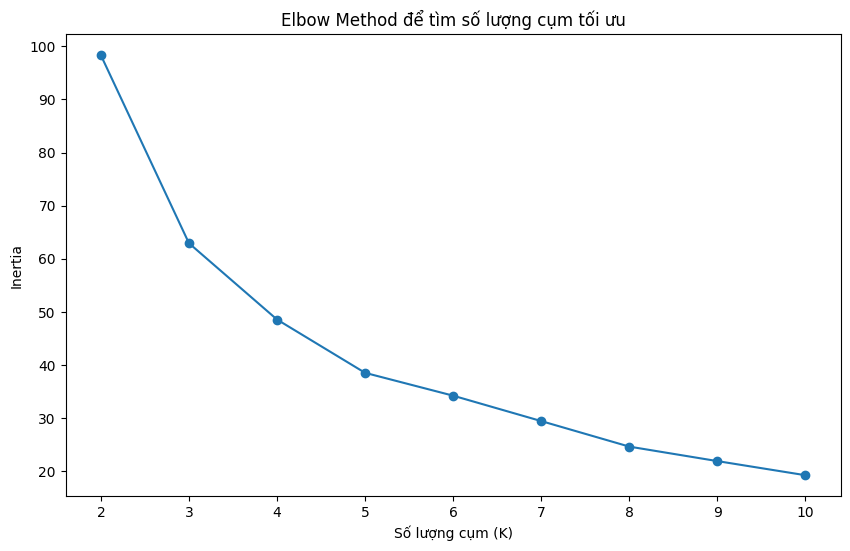

In [ ]:
# Determine optimal number of clusters using the Elbow method
# Elbow method to find the optimal number of clusters

inertia = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm số lượng cụm tối ưu')
plt.xticks(K)
plt.show()

In [ ]:
# Perform KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

reduced['cluster'] = clusters
reduced['Player'] = mid_df['Player']
reduced['Team'] = mid_df['Team']
reduced.columns = ['x', 'y', 'cluster', 'Player', 'Team']
reduced.head()

,x,y,cluster,Player,Team
0,1.313572,-0.672172,0,Moises Caicedo,chelsea
1,1.300803,1.529269,2,Cole Palmer,chelsea
2,1.257150,0.163537,2,Bruno Guimaraes,newcastle utd
3,1.201237,0.307982,2,Youri Tielemans,aston villa
4,0.870159,-0.164814,0,Andre-Frank Zambo Anguissa,napoli


In [125]:
# Show plot of clusters
fig = px.scatter(reduced, x='x', y='y', color='cluster', hover_data=['Player', 'Team'])
fig.show()

In [126]:
mid_df = mid_df.merge(reduced, on=['Player', 'Team'])
mid_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,x,y,cluster
0,Moises Caicedo,MF,chelsea,eng Premier League,23-089,1.000000,1.000000,0.071429,0.222222,0.15,...,0.241379,0.564547,0.338235,0.957447,0.706,80000000.0,0.272727,1.313572,-0.672172,0
1,Cole Palmer,MF,chelsea,eng Premier League,22-269,1.000000,0.987140,1.000000,0.666667,1.00,...,0.500000,0.367103,0.632353,0.489362,0.000,130000000.0,0.227273,1.300803,1.529269,2
2,Bruno Guimaraes,MF,newcastle utd,eng Premier League,27-075,1.000000,0.983025,0.142857,0.666667,0.40,...,0.396552,0.528952,0.500000,0.773050,0.545,80000000.0,0.454545,1.257150,0.163537,2
3,Youri Tielemans,MF,aston villa,eng Premier League,27-268,1.000000,0.956790,0.071429,0.444444,0.25,...,0.344828,0.634216,0.338235,0.659574,0.407,30000000.0,0.454545,1.201237,0.307982,2
4,Andre-Frank Zambo Anguissa,MF,napoli,it Serie A,29-075,0.952381,0.955761,0.357143,0.333333,0.40,...,0.344828,0.356556,0.397059,0.680851,0.566,27000000.0,0.545455,0.870159,-0.164814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Edu Exposito,MF,espanyol,es La Liga,28-182,0.095238,0.003086,0.000000,0.000000,0.00,...,0.034483,0.028090,0.073529,0.035461,0.250,1500000.0,0.500000,-0.593036,0.254335,1
676,Roberto Gagliardini,MF,monza,it Serie A,30-298,0.095238,0.002058,0.000000,0.000000,0.00,...,0.000000,0.023628,0.058824,0.000000,0.500,2000000.0,0.590909,-0.610113,-0.128640,1
677,Chuky san jose,MF,valladolid,es La Liga,20-276,0.142857,0.001543,0.000000,0.000000,0.00,...,0.000000,0.007403,0.014706,0.007092,0.000,14000000.0,0.136364,-0.704085,0.267154,1
678,Florian Neuhaus,MF,gladbach,de Bundesliga,27-320,0.238095,0.001543,0.000000,0.000000,0.00,...,0.017241,0.021702,0.014706,0.049645,0.459,3500000.0,0.454545,-0.588314,0.008002,1


<Axes: title={'center': 'Average Scores for Each Stat by Cluster'}, xlabel='Stats'>

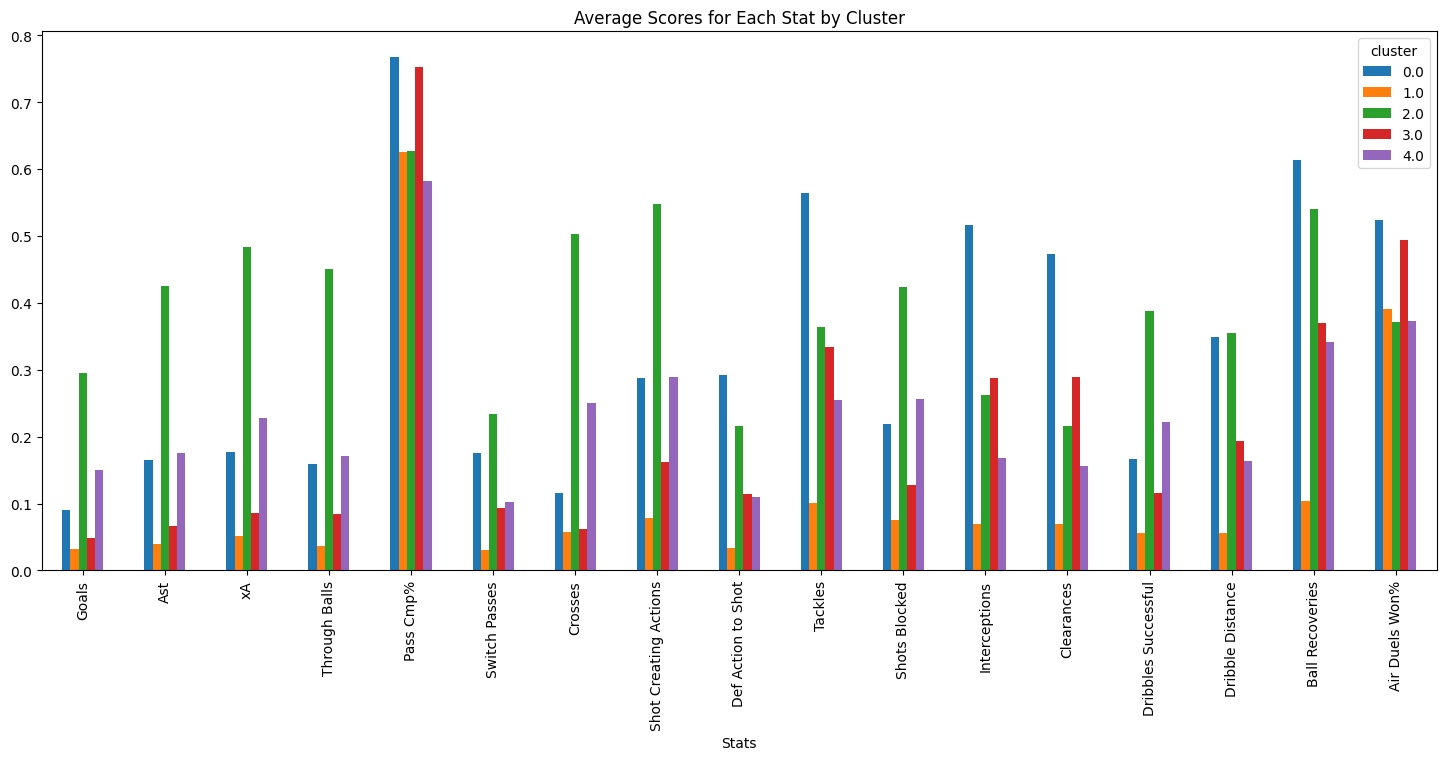

In [134]:
# Setting up average dataframe
avg_0 = pd.DataFrame(mid_df[mid_df.cluster == 0][cols].describe().loc['mean']).T
avg_1 = pd.DataFrame(mid_df[mid_df.cluster == 1][cols].describe().loc['mean']).T
avg_2 = pd.DataFrame(mid_df[mid_df.cluster == 2][cols].describe().loc['mean']).T
avg_3 = pd.DataFrame(mid_df[mid_df.cluster == 3][cols].describe().loc['mean']).T
avg_4 = pd.DataFrame(mid_df[mid_df.cluster == 4][cols].describe().loc['mean']).T

frames = [avg_0, avg_1, avg_2, avg_3, avg_4]
avg_df = pd.concat(frames)
avg_df.set_index('cluster', inplace=True)
avg_df = avg_df.T
avg_df.reset_index(drop=True, inplace=True)
avg_df['Stats'] = pd.Series(cols_2)

# Plotting graph to show which clusters are good in which stats
avg_df.plot(x='Stats', kind='bar', stacked=False, title='Average Scores for Each Stat by Cluster', figsize=(18, 7))

From the graph above, I found these prototypes for Midfielder:

* Cluster 0: Deep-Lying Playmaker
* Cluster 1: Defensive-minded Midfielder
* Cluster 2: Creative Midfielder
* Cluster 3: Balanced Midfielder
* Cluster 4: Possession Retriever


In [135]:
# players_in_cluster_3 = reduced[reduced['Team'] == 'real madrid']

# print(players_in_cluster_3)

            x         y  cluster               Player         Team
19   0.886211 -0.361701        0    Federico Valverde  real madrid
117  0.712376  0.276584        2      Jude Bellingham  real madrid
135  0.332040 -0.626960        0  Aurelien Tchouameni  real madrid
333  0.346175  0.336019        4          Luka Modric  real madrid
414 -0.001111 -0.278333        3        Dani Ceballos  real madrid
438  0.013490  0.181729        4           Arda Guler  real madrid
478 -0.184329 -0.227275        3    Eduardo Camavinga  real madrid


In [138]:
cols = ['cluster', 'Goals', 'xG', 'xA', 'Pass Cmp%', 'SoT%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'G-xG','Ast',
       'Interceptions', 'Dribbles Successful',
       'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

cols_2 = ['Goals', 'xG', 'xA', 'Pass Cmp%', 'SoT%','Ast',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'G-xG',
       'Interceptions', 'Dribbles Successful',
       'Dribble Distance', 'Ball Recoveries', 'Air Duels Won%']

In [139]:
# Clustering forwards
X = fw_df[cols_2]
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X))

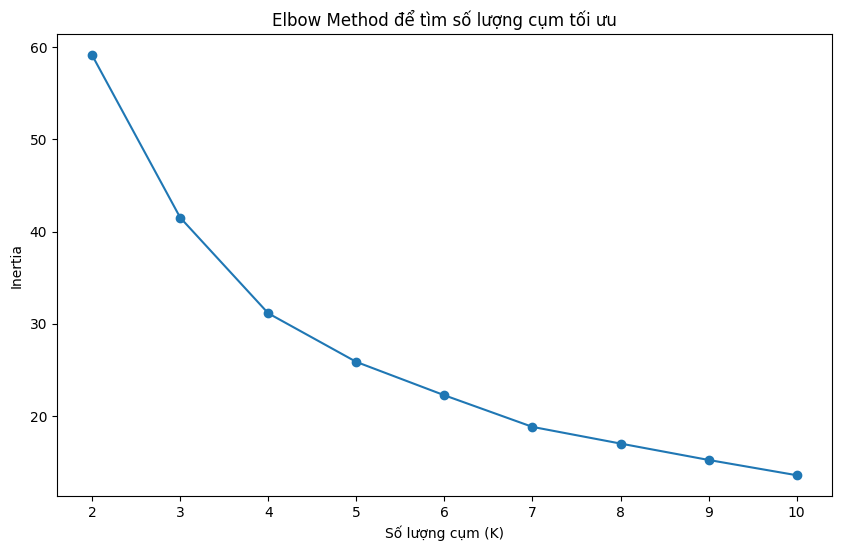

In [ ]:
# Determine optimal number of clusters using the Elbow method
# Elbow method to find the optimal number of clusters

inertia = []
K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method để tìm số lượng cụm tối ưu')
plt.xticks(K)
plt.show()

In [ ]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

reduced['cluster'] = clusters
reduced['Player'] = fw_df['Player']
reduced['Team'] = fw_df['Team']
reduced.columns = ['x', 'y', 'cluster', 'Player', 'Team']
reduced.head()

,x,y,cluster,Player,Team
0,1.489917,0.178522,2,Bryan Mbeumo,brentford
1,0.305808,1.022784,0,Erling Haaland,manchester city
2,1.556744,0.892839,2,Mohamed Salah,liverpool
3,1.561359,-0.228382,2,Alex Iwobi,fulham
4,1.097200,-0.012156,2,Antoine Semenyo,bournemouth


In [143]:
# Show plot of clusters
fig = px.scatter(reduced, x='x', y='y', color='cluster', hover_data=['Player', 'Team'])
fig.show()

In [144]:
fw_df = fw_df.merge(reduced, on=['Player', 'Team'])
fw_df

,Player,Position,Team,Comp,Age-Dob,MP,Min,Goals,Ast,G+A,...,Dribbles Successful,Dribble Distance,Mistakes,Ball Recoveries,Air Duels Won%,Values,Age,x,y,cluster
0,Bryan Mbeumo,FW,brentford,eng Premier League,25-176,1.000000,1.000000,0.736842,0.230769,0.53125,...,0.467742,0.644081,0.866667,0.691176,0.297,50000000.0,0.641026,1.489917,0.178522,2
1,Erling Haaland,FW,manchester city,eng Premier League,24-193,1.000000,0.984802,0.947368,0.153846,0.62500,...,0.161290,0.109068,0.480000,0.125000,0.548,200000000.0,0.615385,0.305808,1.022784,0
2,Mohamed Salah,FW,liverpool,eng Premier League,32-229,0.952381,0.938197,1.000000,1.000000,1.00000,...,0.596774,0.560957,0.853333,0.389706,0.400,55000000.0,0.820513,1.556744,0.892839,2
3,Alex Iwobi,FW,fulham,eng Premier League,28-272,1.000000,0.936170,0.368421,0.230769,0.31250,...,0.564516,1.000000,0.533333,0.610294,0.120,25000000.0,0.717949,1.561359,-0.228382,2
4,Antoine Semenyo,FW,bournemouth,eng Premier League,25-023,0.952381,0.930091,0.368421,0.230769,0.31250,...,0.758065,0.436020,0.720000,0.779412,0.465,28000000.0,0.641026,1.097200,-0.012156,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Mirko Maric,FW,monza,it Serie A,29-259,0.238095,0.003546,0.000000,0.000000,0.00000,...,0.000000,0.020655,0.040000,0.014706,0.333,700000.0,0.743590,-0.575506,-0.153548,1
501,Antonio Raimondo,FW,venezia,it Serie A,20-318,0.333333,0.002026,0.000000,0.000000,0.00000,...,0.000000,0.008816,0.066667,0.022059,0.143,14000000.0,0.512821,-0.516785,0.069082,1
502,Othmane Maamma,FW,montpellier,fr Ligue 1,19-116,0.142857,0.000507,0.052632,0.076923,0.06250,...,0.064516,0.007809,0.093333,0.014706,0.500,800000.0,0.487179,-0.446309,0.182195,1
503,Marc Cardona,FW,las palmas,es La Liga,29-206,0.238095,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.013854,0.013333,0.022059,0.000,1200000.0,0.743590,-0.513401,-0.326427,1


<Axes: title={'center': 'Average Scores for Each Stat by Cluster'}, xlabel='Stats'>

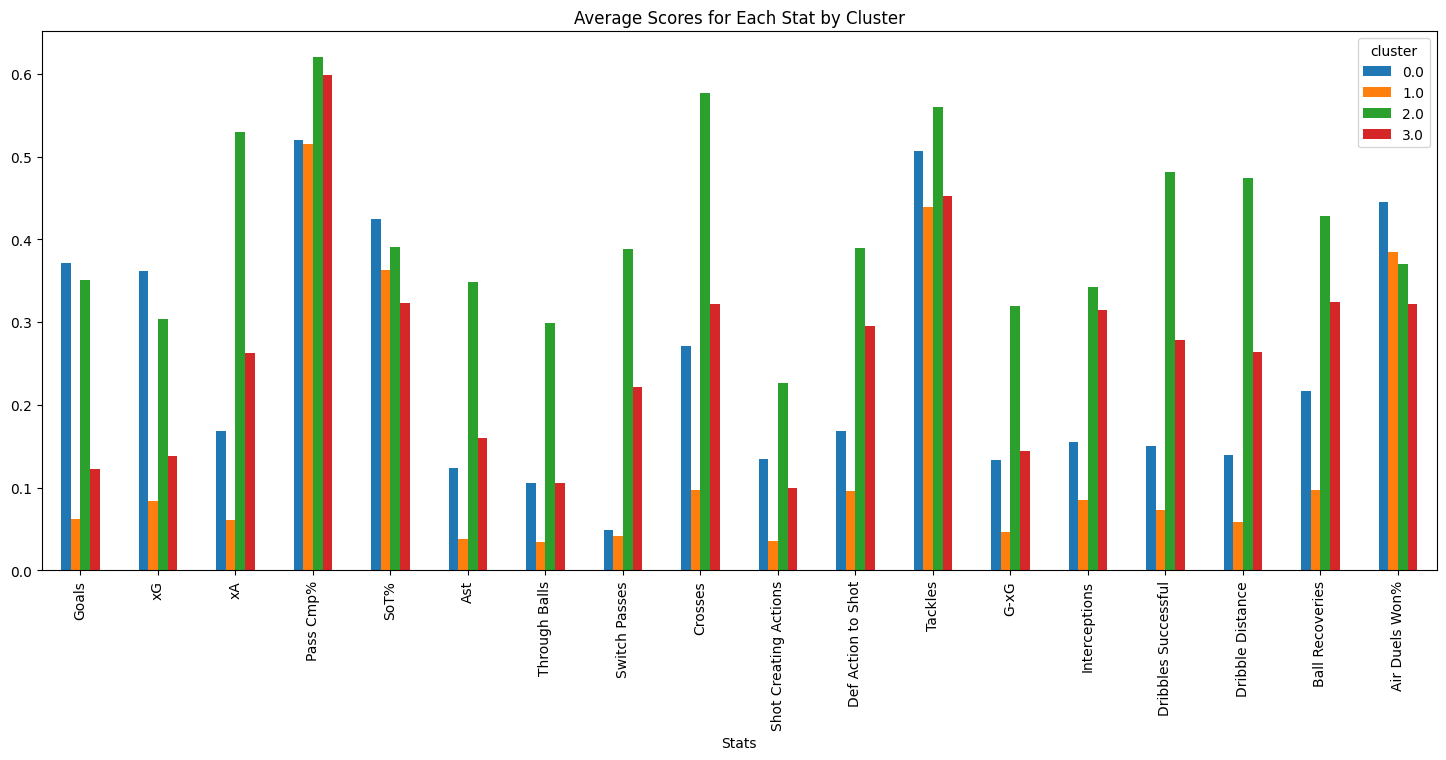

In [145]:
# Setting up average dataframe
avg_0 = pd.DataFrame(fw_df[fw_df.cluster == 0][cols].describe().loc['mean']).T
avg_1 = pd.DataFrame(fw_df[fw_df.cluster == 1][cols].describe().loc['mean']).T
avg_2 = pd.DataFrame(fw_df[fw_df.cluster == 2][cols].describe().loc['mean']).T
avg_3 = pd.DataFrame(fw_df[fw_df.cluster == 3][cols].describe().loc['mean']).T

frames = [avg_0, avg_1, avg_2, avg_3]
avg_df = pd.concat(frames)
avg_df.set_index('cluster', inplace=True)
avg_df = avg_df.T
avg_df.reset_index(drop=True, inplace=True)
avg_df['Stats'] = pd.Series(cols_2)

# Plotting graph to show which clusters are good in which stats
avg_df.plot(x='Stats', kind='bar', stacked=False, title='Average Scores for Each Stat by Cluster', figsize=(18, 7))

From the graph above, I found these prototypes for Forward:

* Cluster 0: Target Man
* Cluster 1: Hard-Working Forward
* Cluster 2: Inside Forward
* Cluster 3: Dribbling Winger

In [146]:
# Drop all columns that we min max scaled
drop_cols = ['Position', 'Comp', 'Age', 'MP', 'Min', 'Goals',
       'Ast', 'G+A', 'xG', 'xA', 'SoT%', 'npxG/Sh', 'G-xG', 'Pass Cmp%',
       'Through Balls', 'Switch Passes', 'Crosses', 'Shot Creating Actions',
       'Def Action to Shot', 'Tackles', 'Shots Blocked',
       'Interceptions', 'Clearances', 'Errors', 'Dribbles Successful',
       'Dribble Distance', 'Mistakes', 'Ball Recoveries', 'Air Duels Won%',
       'Values', 'x', 'y']

def_df.drop(labels=drop_cols, axis=1, inplace=True)
mid_df.drop(labels=drop_cols, axis=1, inplace=True)
fw_df.drop(labels=drop_cols, axis=1, inplace=True)

In [ ]:
# Change the clusters row from numbers to descriptions
def_df['cluster'].replace({0:'Defensive Center-Back', 1:'Potential Outlier/Incomplete Data (Backup Defender or Specialized Defender)',
                           2:"Attacking Full-Back", 3:'Aerial Duel Specialist'}, inplace=True)
mid_df['cluster'].replace({0:"Deep-Lying Playmaker", 1:"Defensive-minded Midfielder", 2:"Creative Midfielder", 3:"Balanced Midfielder", 4:"Possession Retriever"}, inplace=True)
fw_df['cluster'].replace({0:"Target Man", 1:"Hard-Working Forward", 2:"Inside Forward", 3:" Dribbling Winger"}, inplace=True)

In [148]:
# Add the clusters to the original dataframes
def_df_original = def_df_original.merge(def_df, on=['Player', 'Team'])
mid_df_original = mid_df_original.merge(mid_df, on=['Player', 'Team'])
fw_df_original = fw_df_original.merge(fw_df, on=['Player', 'Team'])

In [149]:
# Combine all three datasets in one
final_df = pd.concat([def_df_original, mid_df_original, fw_df_original])

# Save dataframe with clusters/prototypes as csv
final_df.to_csv("Clusters.csv")